<a href="https://colab.research.google.com/github/SungmoonJeong/Study/blob/main/3_2)%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8_%EC%8B%9C%EC%84%B8_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Copyright (c) 2019 [윤기태]

https://github.com/yoonkt200/python-data-analysis

[MIT License](https://github.com/yoonkt200/python-data-analysis/blob/master/LICENSE.txt)

# (가제) 파이썬 데이터 분석

-----

# 3.2) 비트코인 시세 예측하기

### 바로가기

- [<Step1. 탐색> : 시간정보가 포함된 데이터 살펴보기](#<Step1.-탐색>-:-시간정보가-포함된-데이터-살펴보기)
    - [market price 데이터셋의 기본 정보]
    - [시계열 데이터 살펴보기]
- [<Step2. 예측> : 파이썬 라이브러리를 활용한 시세 예측](#<Step2.-예측>-:-파이썬-라이브러리를-활용한-시세-예측)
    - [ARIMA 모델 활용하기]
    - [Facebook Prophet 활용하기]
- [<Step3. 활용> : 더 나은 결과를 위한 방법들](#<Step3.-활용>-:-더-나은-결과를-위한-방법들)
    - [상한가 및 하한가 선정]
    - [이상치 제거하기]
    - [하이퍼 파라미터 선정하기]
- [재미로 알아보는 내일의 비트코인 시세](#재미로-알아보는-내일의-비트코인-시세)

-----

In [ ]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# <Step1. 탐색> : 시간정보가 포함된 데이터 살펴보기

### [market price 데이터셋의 기본 정보]

In [ ]:
# Data Source : https://www.blockchain.com/ko/charts/market-price?timespan=60days

file_path = '/content/market-price.csv'
bitcoin_df = pd.read_csv(file_path, names = ['day', 'price'])

In [ ]:
# 기본 정보를 출력합니다.
print(bitcoin_df.shape)
print(bitcoin_df.info())

(365, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     365 non-null    object 
 1   price   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None


In [ ]:
bitcoin_df.shape

(365, 2)

In [ ]:
bitcoin_df.tail()

,day,price
360,2018-08-22 00:00:00,6575.229167
361,2018-08-23 00:00:00,6434.881667
362,2018-08-24 00:00:00,6543.645714
363,2018-08-25 00:00:00,6719.429231
364,2018-08-26 00:00:00,6673.274167


-----

### [시계열 데이터 살펴보기]

In [ ]:
# to_datetime으로 day 피처를 시계열 피처로 변환합니다.
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'])

# day 데이터프레임의 index로 설정합니다.
bitcoin_df.index = bitcoin_df['day']
bitcoin_df.set_index('day', inplace=True)
bitcoin_df.head()

,price
day,
2017-08-27,4354.308333
2017-08-28,4391.673517
2017-08-29,4607.985450
2017-08-30,4594.987850
2017-08-31,4748.255000


In [ ]:
bitcoin_df.describe()

,price
count,365.000000
mean,8395.863578
std,3239.804756
min,3319.630000
25%,6396.772500
50%,7685.633333
75%,9630.136277
max,19498.683333


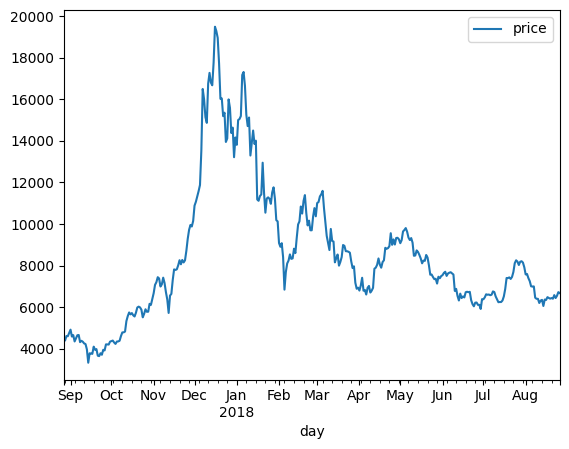

In [ ]:
# 일자별 비트코인 시세를 시각화합니다.
bitcoin_df.plot()
plt.show()

-----

# <Step2. 예측> : 파이썬 라이브러리를 활용한 시세 예측

### [ARIMA 모델 활용하기]

###### ARIMA 모델 학습

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

from statsmodels.tsa.arima.model import ARIMA  # 새 ARIMA 모듈
import pandas as pd

# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(bitcoin_df.price.values, order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  365
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2787.490
Date:                Mon, 27 Jan 2025   AIC                           5584.980
Time:                        08:40:14   BIC                           5604.466
Sample:                             0   HQIC                          5592.725
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2418      0.305      0.794      0.427      -0.355       0.839
ar.L2          0.6072      0.200      3.038      0.002       0.215       0.999
ma.L1         -0.1513      0.306     -0.495      0.6

-----

###### 모델의 성능 & 예측 결과 시각화
- 학습한 모델이 학습 데이터에 대해서 예측한 결과만을 시각화합니다.

In [ ]:
fig = model_fit.plot_predict() # 학습 데이터에 대한 예측 결과입니다. (첫번째 그래프)
residuals = pd.DataFrame(model_fit.resid) # 잔차의 변동을 시각화합니다. (두번째 그래프)
residuals.plot()

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'

###### 실제 데이터와의 비교
- 예측 결과인 마지막 5일의 예측값을 실제 데이터와 비교해봅니다.
- 5일 후의 실제 데이터는 `'../data/market-price-test.csv'` 에서 불러올 수 있습니다. 데이터를 직접 다운로드(https://www.blockchain.com/ko/charts/market-price?timespan=60days) 하여 여러분이 직접 만든 모델을 마음대로의 기간으로 예측해 보세요.

In [ ]:
forecast_data.shape

(5,)

In [ ]:
forecast_data.shape

(5,)

In [ ]:
# forecast_data = model_fit.forecast(steps=5, alpha=0.05)  # alpha=0.05는 95% 신뢰 구간을 의미합니다. # 학습 데이터셋으로부터 5일 뒤를 예측합니다.

# # 테스트 데이터셋을 불러옵니다.
# test_file_path = '/content/market-price-test.csv'
# bitcoin_test_df = pd.read_csv(test_file_path, names=['ds', 'y'])

# pred_y = forecast_data[0].tolist() # 마지막 5일의 예측 데이터입니다. (2018-08-27 ~ 2018-08-31)
# test_y = bitcoin_test_df.y.values # 실제 5일 가격 데이터입니다. (2018-08-27 ~ 2018-08-31)
# pred_y_lower = [] # 마지막 5일의 예측 데이터의 최소값입니다.
# pred_y_upper = [] # 마지막 5일의 예측 데이터의 최대값입니다.
# for lower_upper in forecast_data[2]:
#     lower = lower_upper[0]
#     upper = lower_upper[1]
#     pred_y_lower.append(lower)
#     pred_y_upper.append(upper)

## 위의 코드가 작동하지 않음

# 테스트 데이터셋 불러오기
test_file_path = '/content/market-price-test.csv'
bitcoin_test_df = pd.read_csv(test_file_path, names=['ds', 'y'])
test_y = bitcoin_test_df.y.values  # 실제 5일 가격 데이터

# 예측 결과와 신뢰 구간을 얻기 위해 get_forecast() 메서드를 사용합니다.
forecast_results = model_fit.get_forecast(steps=5, alpha=0.05)
forecast_data = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()  # 신뢰 구간 (numpy.ndarray 반환)
print(f"forcast_results : {forecast_results}")
print(f"forcast_data : {forecast_data}")
print(f"conf_int : {conf_int}")
# 예측된 값과 신뢰 구간을 리스트로 저장합니다.
pred_y = forecast_data.tolist()
pred_y_lower = conf_int[:, 0].tolist()  # 신뢰 구간의 하한 (numpy 인덱싱)
pred_y_upper = conf_int[:, 1].tolist()  # 신뢰 구간의 상한 (numpy 인덱싱)

print(f"pred_y : {pred_y}")
print(f"pred_y_lower : {pred_y_lower}")
print(f"pred_y_upper : {pred_y_upper}")




forcast_results : <statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper object at 0x7f4f3cffba90>
forcast_data : [6672.47135647 6674.46904507 6674.46468892 6675.67663967 6675.96708808]
conf_int : [[5668.40520813 7676.53750482]
 [5188.84487858 8160.09321156]
 [4853.29265769 8495.63672014]
 [4548.85408735 8802.49919199]
 [4288.75372006 9063.18045611]]
pred_y : [6672.471356470469, 6674.469045072102, 6674.464688916111, 6675.676639669709, 6675.967088083133]
pred_y_lower : [5668.405208125931, 5188.844878583525, 4853.292657687581, 4548.854087345151, 4288.753720060062]
pred_y_upper : [7676.537504815007, 8160.093211560678, 8495.636720144641, 8802.499191994268, 9063.180456106204]


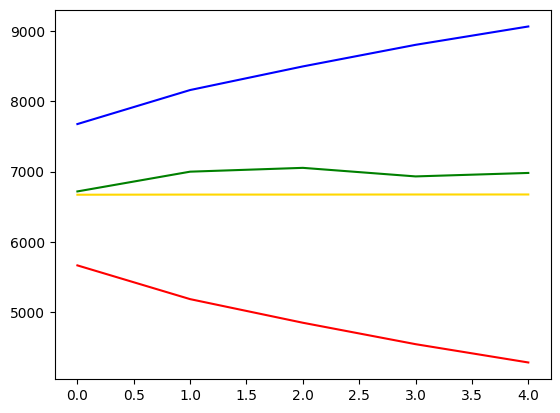

In [ ]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

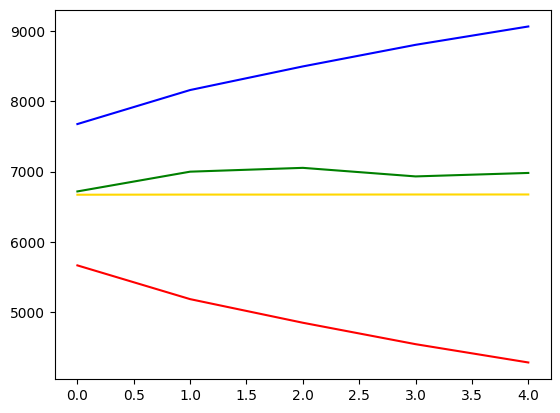

In [ ]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

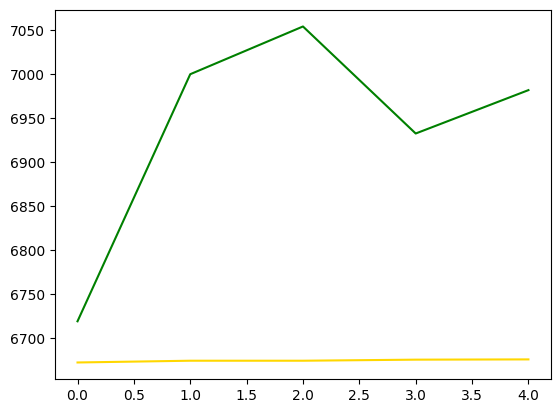

In [ ]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

-----

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

287.09165032407606


-----

### [Facebook Prophet 활용하기]

- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지들을 설치해 줍니다.
    - (env_name) `conda install -c conda-forge fbprophet`
- prophet의 input data columns는 'ds'와 'y'로 고정되어야 합니다.
- seasonality_mode : 연간, 월간, 주간, 일간 등의 트렌드성을 반영하는 것을 의미합니다. 비트코인 데이터의 경우 대부분의 주기마다 트렌드성이 반영되는 것이 좋습니다.
- changepoint_prior_scale : 트렌드가 변경되는 문맥을 반영하여 예측합니다. 수치가 높을수록 overfitting에 가까워집니다.

###### Prophet 모델 학습

In [ ]:
# from fbprophet import Prophet

!pip install prophet
from prophet import Prophet


In [ ]:
# prophet을 사용하기 위해서는 다음과 같이 피처의 이름을 변경해야 합니다 : 'ds', 'y'
bitcoin_df = pd.read_csv(file_path, names=['ds', 'y'])
prophet = Prophet(seasonality_mode='multiplicative',
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0etb5e1u/uhnnh8l2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0etb5e1u/br_zxkda.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73592', 'data', 'file=/tmp/tmp0etb5e1u/uhnnh8l2.json', 'init=/tmp/tmp0etb5e1u/br_zxkda.json', 'output', 'file=/tmp/tmp0etb5e1u/prophet_modelzlagn_11/prophet_model-20250127084030.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:40:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:40:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


-----

###### 모델로부터 예측할 기간을 정의하고, 결과를 도출.

In [ ]:
# 5일을 내다보며 예측합니다.
future_data = prophet.make_future_dataframe(periods=5, freq='d')
forecast_data = prophet.predict(future_data)

In [ ]:
forecast_data.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
365,2018-08-27,768.965968,6210.465639,7589.614141,768.965968,768.965968,9.21536,9.21536,9.21536,7.967544,...,-0.006717,-0.006717,-0.006717,-1.241100,-1.241100,-1.241100,0.0,0.0,0.0,6895.735776
366,2018-08-28,773.297351,6321.749262,7633.715467,773.297351,773.297351,9.21536,9.21536,9.21536,8.042752,...,0.026761,0.026761,0.026761,-1.199369,-1.199369,-1.199369,0.0,0.0,0.0,6992.735874
367,2018-08-29,777.628734,6267.134066,7656.654977,776.528660,780.933380,9.21536,9.21536,9.21536,7.989741,...,-0.054041,-0.054041,-0.054041,-1.171578,-1.171578,-1.171578,0.0,0.0,0.0,6990.681170
368,2018-08-30,781.960116,6305.934372,7787.840065,771.928882,793.290579,9.21536,9.21536,9.21536,8.024422,...,-0.030718,-0.030718,-0.030718,-1.160220,-1.160220,-1.160220,0.0,0.0,0.0,7056.738169
369,2018-08-31,786.291499,6357.080203,7918.676159,764.766978,809.966667,9.21536,9.21536,9.21536,8.083313,...,0.035192,0.035192,0.035192,-1.167239,-1.167239,-1.167239,0.0,0.0,0.0,7142.131624


In [ ]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
365,2018-08-27,6895.735776,6210.465639,7589.614141
366,2018-08-28,6992.735874,6321.749262,7633.715467
367,2018-08-29,6990.681170,6267.134066,7656.654977
368,2018-08-30,7056.738169,6305.934372,7787.840065
369,2018-08-31,7142.131624,6357.080203,7918.676159


-----

###### 결과의 시각화

- 전체 데이터를 기반으로 학습한, 5일 단위의 예측 결과를 시각화합니다.

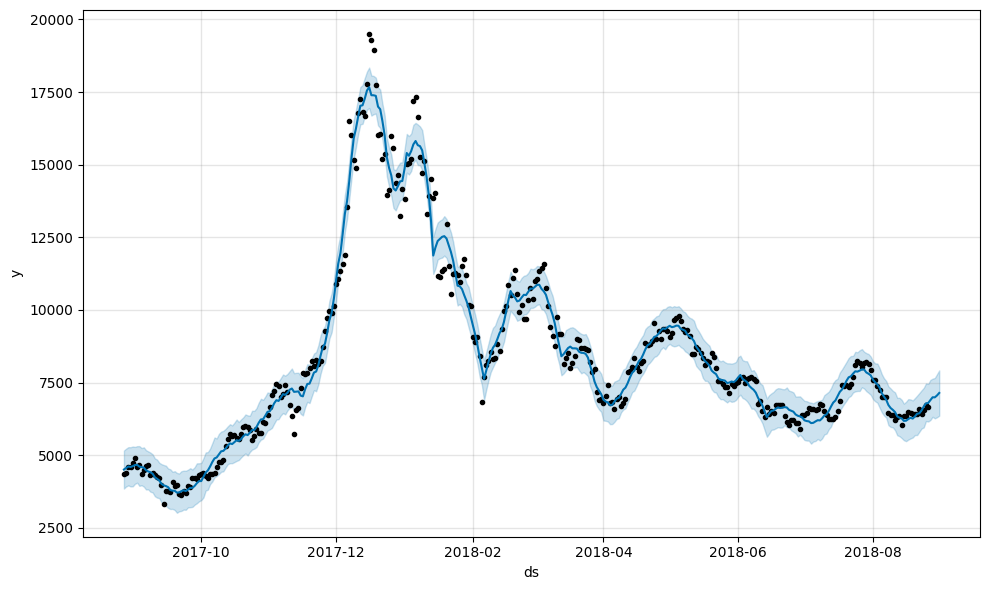

In [ ]:
fig1 = prophet.plot(forecast_data)

-----

- seasonality_mode로 설정했었던 기간별 트렌드 정보를 시각화합니다.

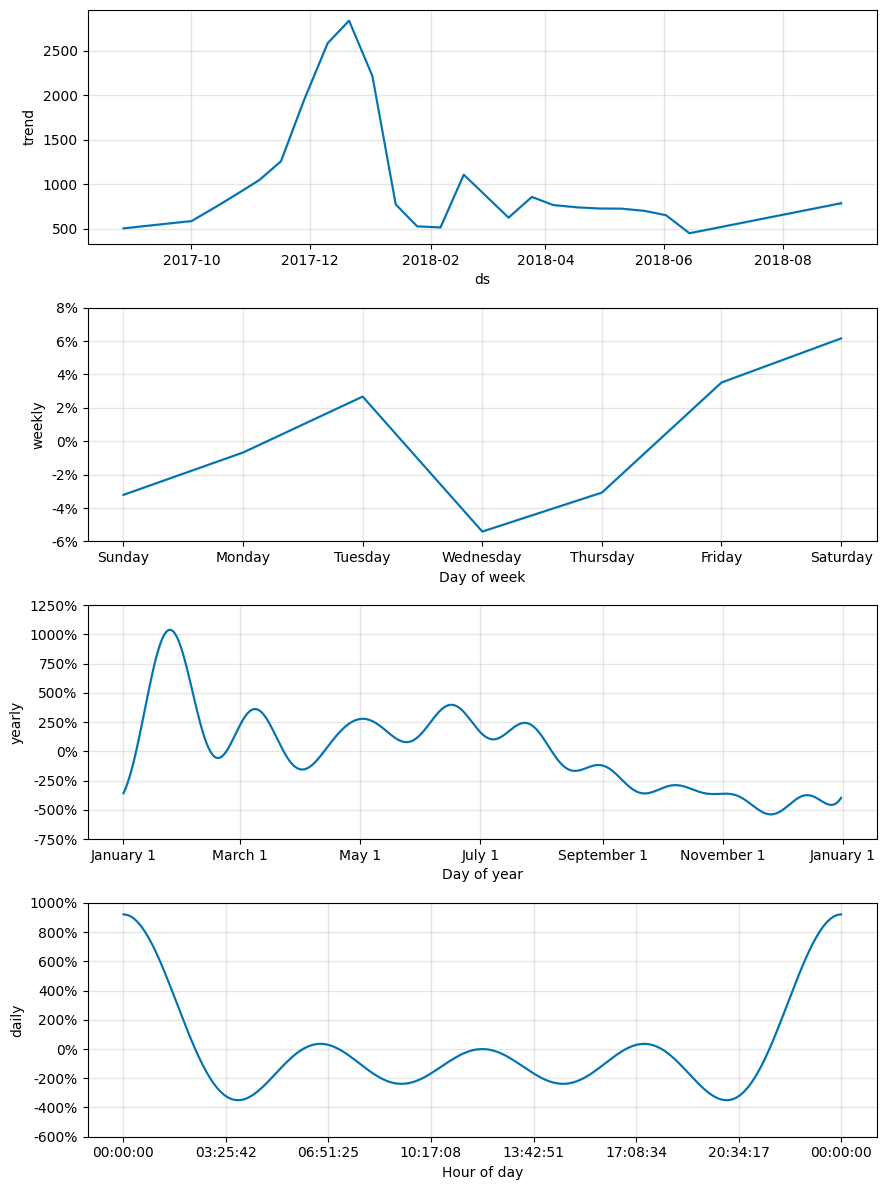

In [ ]:
fig2 = prophet.plot_components(forecast_data)

-----

###### 모델의 성능
- 실제 가격과 예측한 가격간의 차이 : 첫 5일과 마지막 5일은 제외하고 계산합니다.

In [ ]:
y = bitcoin_df.y.values[5:] # 첫 5일을 제외한 실제 가격 데이터입니다.
y_pred = forecast_data.yhat.values[5:-5] # 첫 5일, 마지막 5일을 제외한 예측 가격 데이터입니다.

In [ ]:
rmse = sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(rmse)
print(r2)

520.6031793334993
0.9739477583480679


-----

###### 실제 데이터와의 비교
- 예측 결과인 마지막 5일의 예측값을 실제 데이터와 비교해봅니다.
- 5일 후의 실제 데이터는 `'../data/market-price-test.csv'` 에서 불러올 수 있습니다. 데이터를 직접 다운로드(https://www.blockchain.com/ko/charts/market-price?timespan=60days) 하여 여러분이 직접 만든 모델을 마음대로의 기간으로 예측해 보세요.

In [ ]:
bitcoin_test_df = pd.read_csv(test_file_path, names=['ds', 'y'])

pred_y = forecast_data.yhat.values[-5:] # 마지막 5일의 예측 데이터입니다. (2018-08-27 ~ 2018-08-31)
test_y = bitcoin_test_df.y.values # 실제 5일 가격 데이터입니다. (2018-08-27 ~ 2018-08-31)
pred_y_lower = forecast_data.yhat_lower.values[-5:] # 마지막 5일의 예측 데이터의 최소값입니다.
pred_y_upper = forecast_data.yhat_upper.values[-5:] # 마지막 5일의 예측 데이터의 최대값입니다.

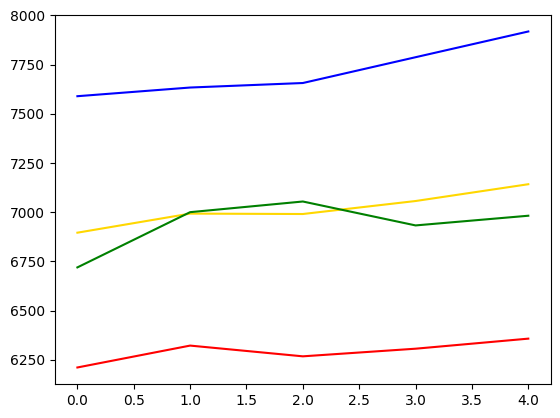

In [ ]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

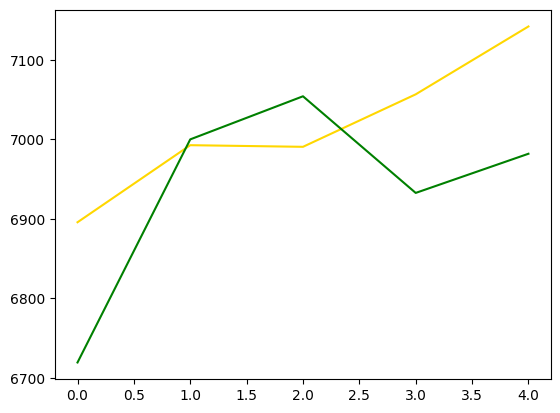

In [ ]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

-----

In [ ]:
rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

123.52602247708572


-----

# <Step3. 활용> : 더 나은 결과를 위한 방법들

### [상한가 및 하한가 선정]

- 주가데이터의 경우 의미가 없지만, 일반적인 시계열 데이터의 경우 상한값 혹은 하한값을 잘 설정해주는 것이 도움이 되기도 합니다.

In [ ]:
bitcoin_df = pd.read_csv(file_path, names=['ds', 'y'])

# 상한가를 설정합니다.
bitcoin_df['cap'] = 20000

# 상한가 적용을 위한 파라미터를 다음과 같이 설정합니다.
prophet = Prophet(seasonality_mode='multiplicative',
                  growth='logistic',
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0etb5e1u/briyaksz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0etb5e1u/_ke3fkul.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59351', 'data', 'file=/tmp/tmp0etb5e1u/briyaksz.json', 'init=/tmp/tmp0etb5e1u/_ke3fkul.json', 'output', 'file=/tmp/tmp0etb5e1u/prophet_modelawa7grcb/prophet_model-20250127090403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:04:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:04:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# 5일을 내다보며 예측합니다.
future_data = prophet.make_future_dataframe(periods=5, freq='d')

# 상한가를 설정합니다.
future_data['cap'] = 20000
forecast_data = prophet.predict(future_data)

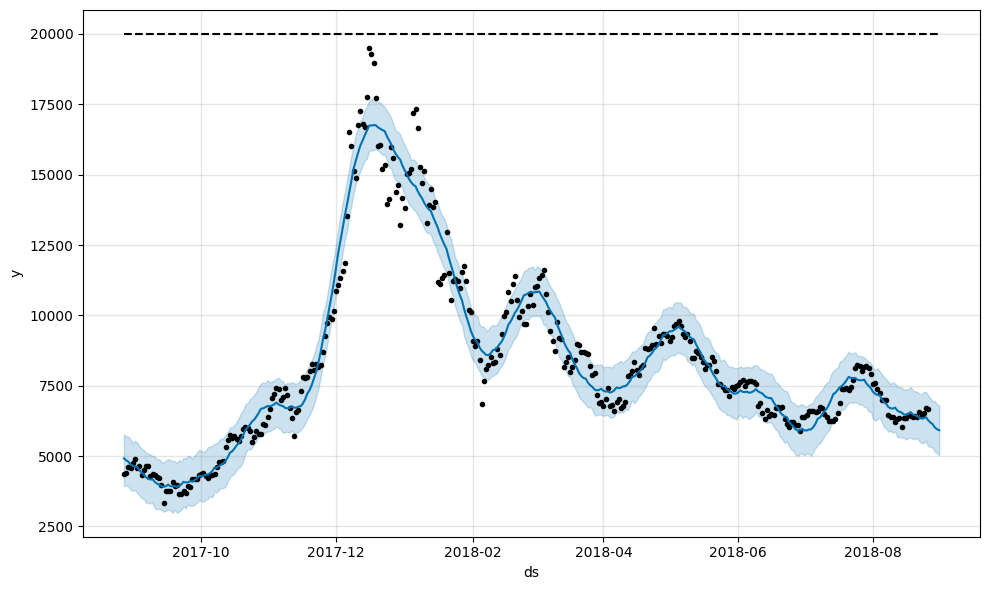

In [ ]:
fig = prophet.plot(forecast_data)

-----

###### 실제 데이터와의 비교
- 비트코인 데이터의 경우, 상한선을 둠으로써 오히려 예측력이 다소 떨어지는 결과를 보였습니다.

In [ ]:
bitcoin_test_df = pd.read_csv(test_file_path, names=['ds', 'y'])

# 모델이 예상한 마지막 5일의 가격 데이터를 가져옵니다.
pred_y = forecast_data.yhat.values[-5:]
test_y = bitcoin_test_df.y.values
pred_y_lower = forecast_data.yhat_lower.values[-5:]
pred_y_upper = forecast_data.yhat_upper.values[-5:]

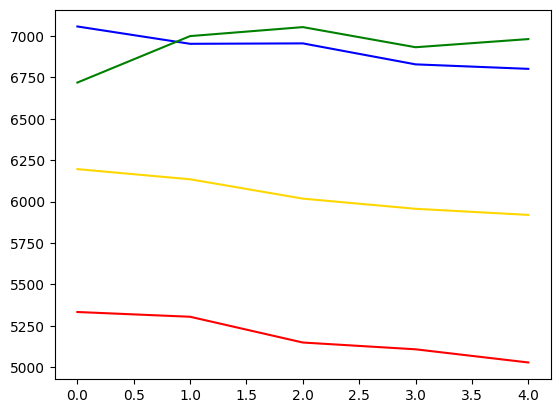

In [ ]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

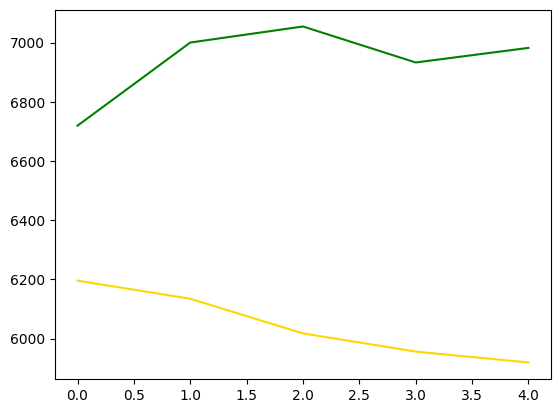

In [ ]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

-----

In [ ]:
rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

914.159580873248


-----

### [이상치 제거하기]

- 가격이 18000을 넘어가는 값을 이상치로 판단하여 제거합니다.

In [ ]:
# 18000 이상의 데이터는 이상치라고 판단
bitcoin_df = pd.read_csv(file_path, names=['ds', 'y'])
bitcoin_df.loc[bitcoin_df['y'] > 18000, 'y'] = None

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0etb5e1u/48o5gfjy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0etb5e1u/lrdrxrau.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6525', 'data', 'file=/tmp/tmp0etb5e1u/48o5gfjy.json', 'init=/tmp/tmp0etb5e1u/lrdrxrau.json', 'output', 'file=/tmp/tmp0etb5e1u/prophet_modell4o98xy_/prophet_model-20250127090928.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:09:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:09:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


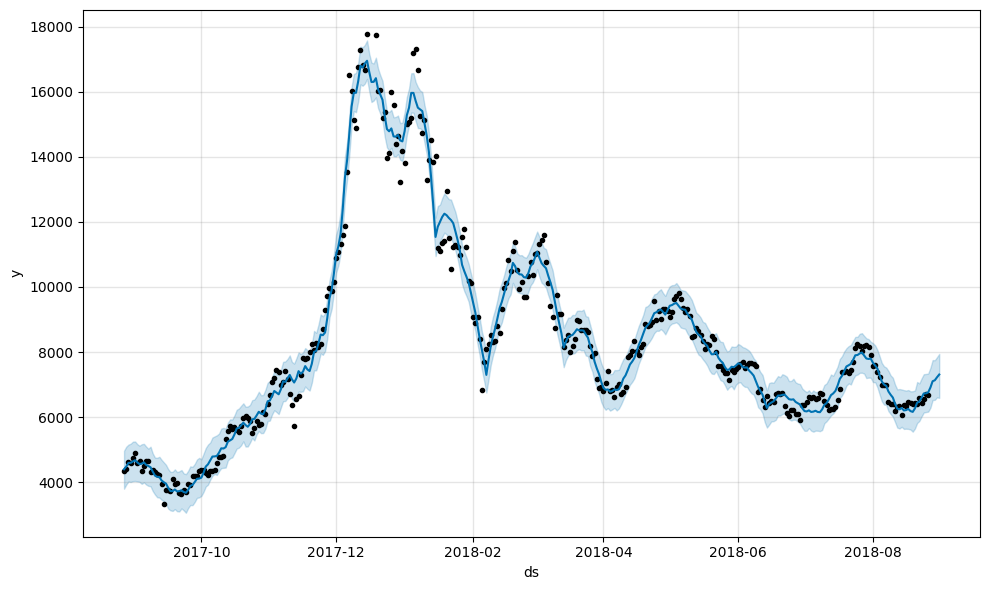

In [ ]:
# prophet 모델을 학습합니다.
prophet = Prophet(seasonality_mode='multiplicative',
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)

# 5일단위의 미래를 예측합니다.
future_data = prophet.make_future_dataframe(periods=5, freq='d')
forecast_data = prophet.predict(future_data)

# 예측 결과를 그래프로 출력합니다.
fig = prophet.plot(forecast_data)

-----

###### 실제 데이터와의 비교
- 비트코인 데이터의 경우, 이상치를 제거함으로써 오히려 예측력이 다소 떨어지는 결과를 보였습니다.
- 모델의 정확도 스코어 측면에서는 떨어졌지만, 트렌드 예측의 측면에서는 다소 나은 모습을 보여줄 수도 있습니다.

In [ ]:
bitcoin_test_df = pd.read_csv(test_file_path, names = ['ds', 'y'])

# 모델이 예상한 마지막 5일의 가격 데이터를 가져옵니다.
pred_y = forecast_data.yhat.values[-5:]
test_y = bitcoin_test_df.y.values
pred_y_lower = forecast_data.yhat_lower.values[-5:]
pred_y_upper = forecast_data.yhat_upper.values[-5:]

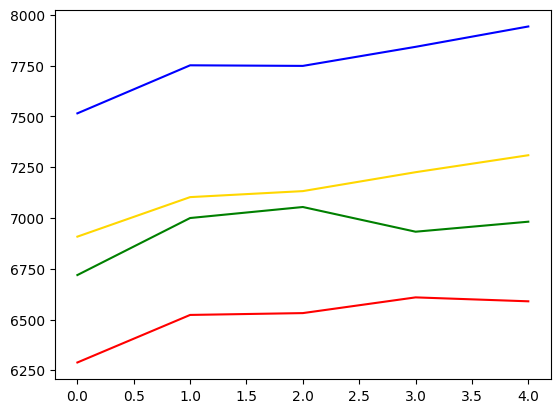

In [ ]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

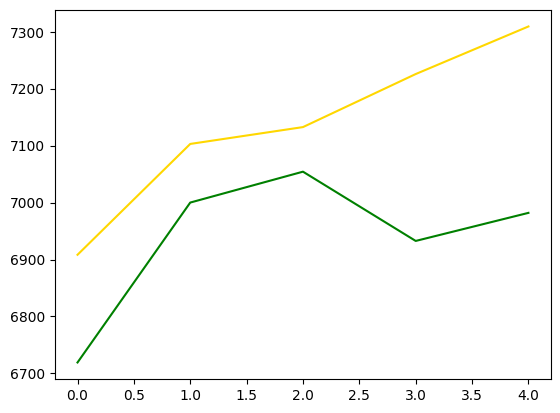

In [ ]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

-----

In [ ]:
# 테스트 데이터의 RMSE를 출력합니다.
rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

221.5580371044274


-----

### `한걸음 더 나아가기`

### [ARIMA 모델의 하이퍼 파라미터 선정하기]

###### 적절한 파라미터 선정하기
- ARIMA 모델은 p,d,q 세 가지 파라미터를 적절하게 선정하는 것이 가장 중요합니다.
- ACF(Autocorrelation function), PACF(Partial autocorrelation function) 그래프를 통해 대략적인 파라미터를 선정합니다.

In [ ]:
bitcoin_df = pd.read_csv(file_path, names = ['day', 'price'])
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'])
bitcoin_df.index = bitcoin_df['day']
bitcoin_df.set_index('day', inplace=True)

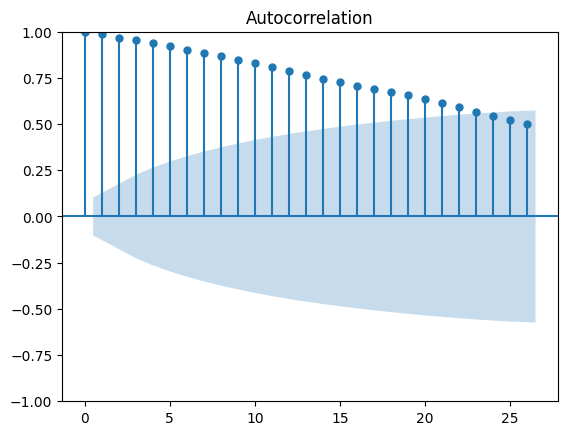

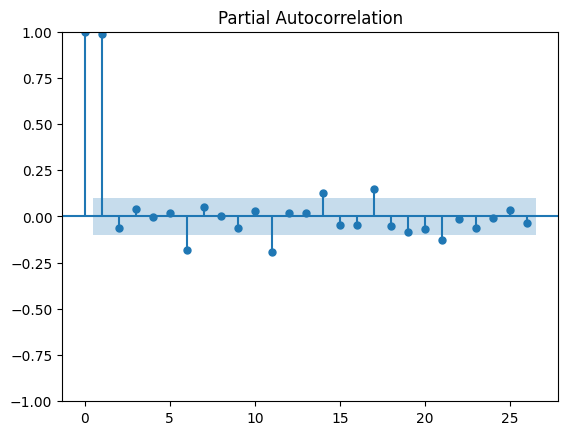

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(bitcoin_df.price.values)
plot_pacf(bitcoin_df.price.values)
plt.show()

-----

###### ARIMA 모델 학습
- 그래프를 토대로 1차 학습

In [ ]:
model = ARIMA(bitcoin_df.price.values, order=(15,2,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  365
Model:                ARIMA(15, 2, 0)   Log Likelihood               -2767.330
Date:                Mon, 27 Jan 2025   AIC                           5566.659
Time:                        09:18:05   BIC                           5628.970
Sample:                             0   HQIC                          5591.427
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8109      0.038    -21.067      0.000      -0.886      -0.735
ar.L2         -0.7800      0.049    -15.761      0.000      -0.877      -0.683
ar.L3         -0.7108      0.055    -12.958      0.0

-----

- 1차 결과를 토대로 2차 학습

In [ ]:
model = ARIMA(bitcoin_df.price.values, order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  365
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2787.490
Date:                Mon, 27 Jan 2025   AIC                           5584.980
Time:                        09:18:14   BIC                           5604.466
Sample:                             0   HQIC                          5592.725
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2418      0.305      0.794      0.427      -0.355       0.839
ar.L2          0.6072      0.200      3.038      0.002       0.215       0.999
ma.L1         -0.1513      0.306     -0.495      0.6

-----

# 재미로 알아보는 내일의 비트코인 시세

###### 좋은 예측력을 보였던 Prophet 모델로 향후 5일간의 비트코인 시세를 예측해 봅시다.

In [ ]:
# prophet을 사용하기 위해서는 다음과 같이 피처의 이름을 변경해야 합니다 : 'ds', 'y'
bitcoin_df = pd.read_csv(file_path, names = ['ds', 'y'])
prophet = Prophet(seasonality_mode='multiplicative',
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0etb5e1u/itr5vq75.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0etb5e1u/2powxr7r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80567', 'data', 'file=/tmp/tmp0etb5e1u/itr5vq75.json', 'init=/tmp/tmp0etb5e1u/2powxr7r.json', 'output', 'file=/tmp/tmp0etb5e1u/prophet_model1p1liwh8/prophet_model-20250127091817.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:18:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:18:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# 5일단위의 미래를 예측합니다.
future_data = prophet.make_future_dataframe(periods=5, freq = 'd')
forecast_data = prophet.predict(future_data)

In [ ]:
# 테스트 데이터를 불러옵니다.
bitcoin_test_df = pd.read_csv(test_file_path, names = ['ds', 'y'])

# 마지막 5일의 데이터를 가져옵니다.
pred_y = forecast_data.yhat.values[-5:]
test_y = bitcoin_test_df.y.values
pred_y_lower = forecast_data.yhat_lower.values[-5:]
pred_y_upper = forecast_data.yhat_upper.values[-5:]

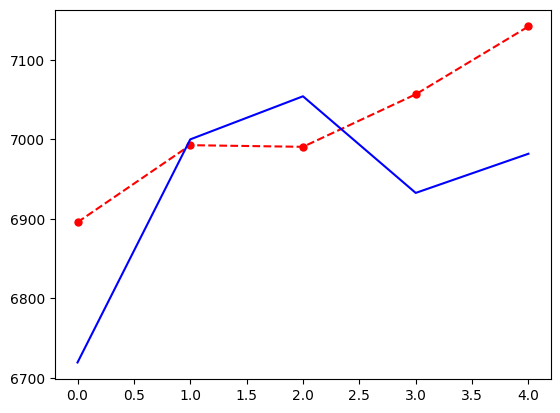

In [ ]:
plt.plot(pred_y, color="red", ls="--", marker="o", ms=5) # 모델이 예상한 가격 그래프입니다.
plt.plot(test_y, color="blue") # 실제 가격 그래프입니다.